### Question 1

In [17]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### Data Loading

In [3]:
data = sio.loadmat('EBAY_20141120.mat')

In [4]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

### Midprice, Microprice and Spread

In [5]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

In [37]:
import pandas as pd
df = pd.DataFrame(midprice)

In [41]:
df.describe()

,0
count,234000.000000
mean,54.512742
std,0.049491
min,54.325000
25%,54.495000
50%,54.505000
75%,54.535000
max,54.725000


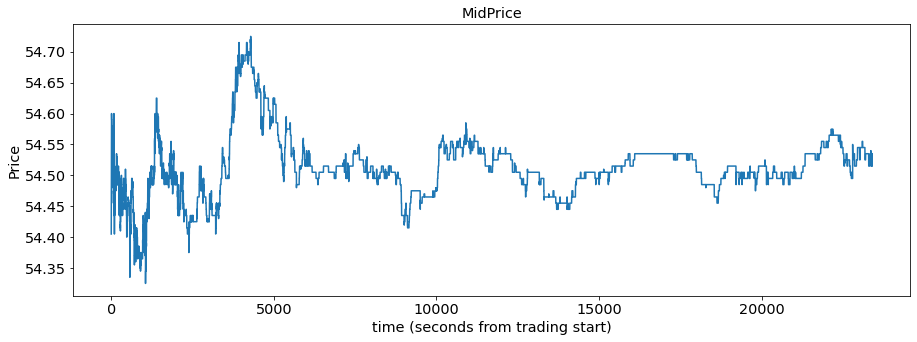

In [6]:
plt.plot(t, midprice)
plt.title('MidPrice')
plt.ylabel('Price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [42]:
df = pd.DataFrame(microprice)

In [44]:
df.describe()

,0
count,234000.000000
mean,54.513067
std,0.049598
min,54.322500
25%,54.492211
50%,54.508318
75%,54.536188
max,54.727692


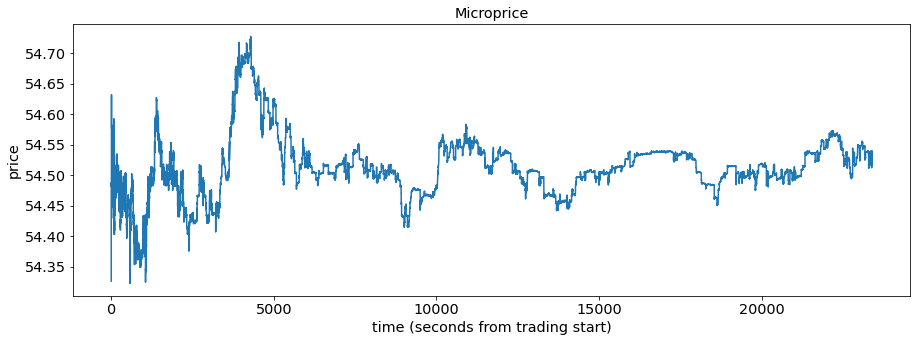

In [7]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [45]:
df = pd.DataFrame(spread)

In [46]:
df.describe()

,0
count,234000.000000
mean,0.010967
std,0.004980
min,0.010000
25%,0.010000
50%,0.010000
75%,0.010000
max,0.210000


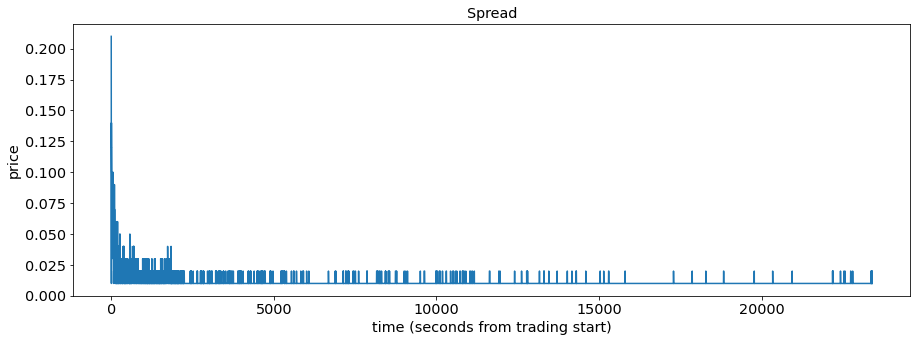

In [8]:
plt.plot(t, spread)
plt.title('Spread')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

### plot the difference between micro and mid prices

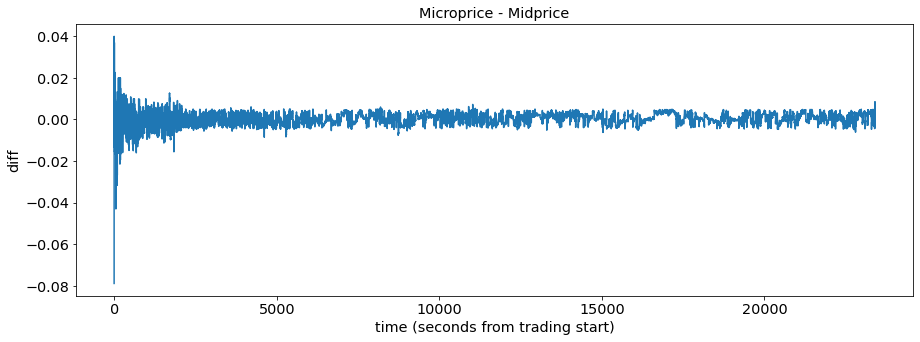

In [9]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

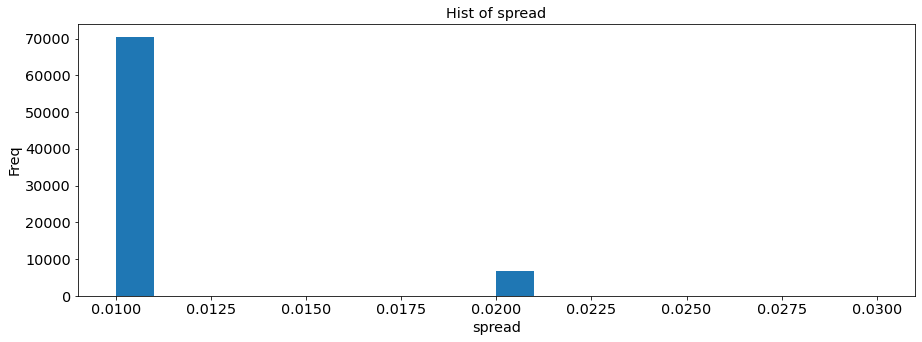

In [10]:
plt.hist(spread,bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("Hist of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

### Volume Imbalance 

In [11]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

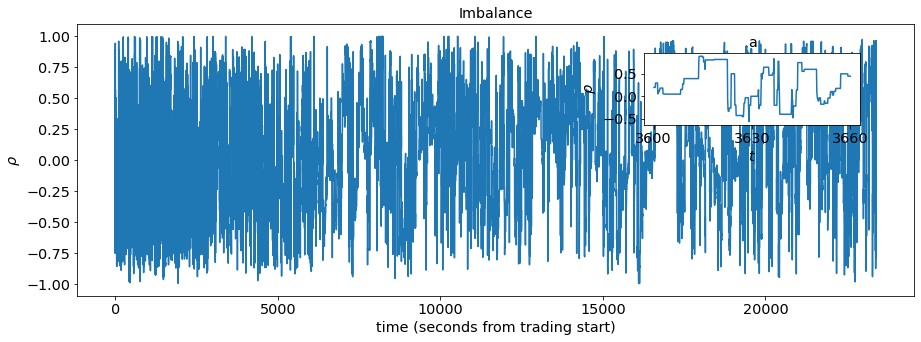

In [12]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

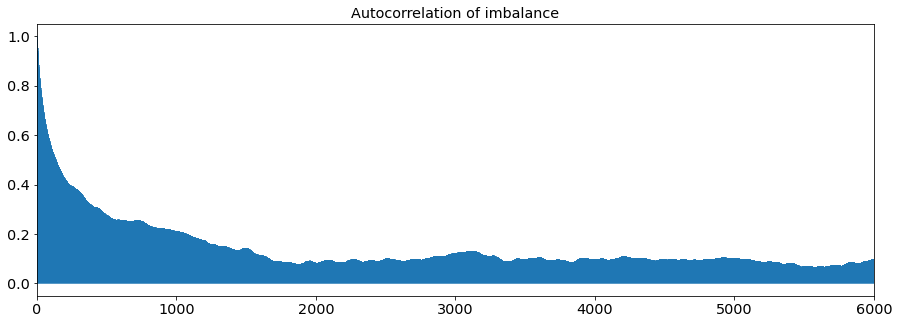

In [13]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

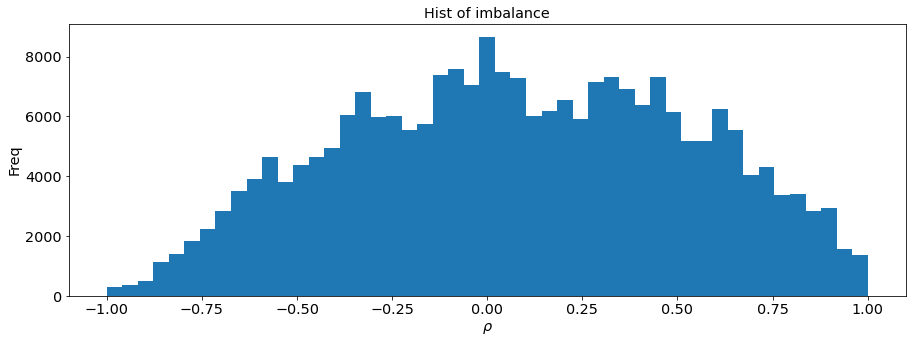

In [14]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

### Volume Imbalance at times of Market Orders


In [15]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])


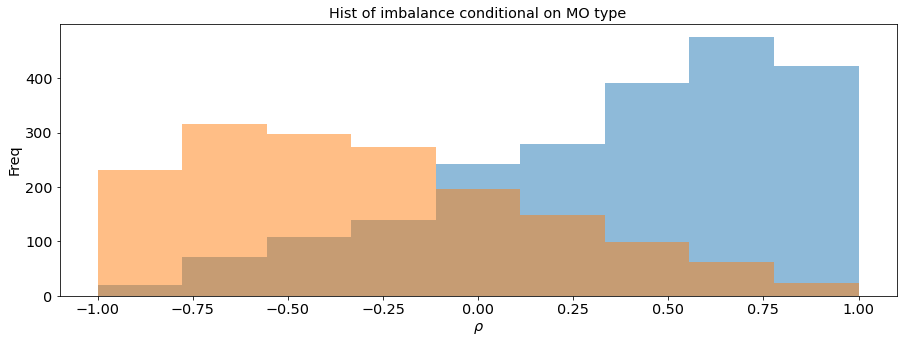

In [16]:
plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Hist of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

### Question 2 

In [18]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
import ipywidgets as widgets

In [25]:
# Import necessary libraries.
import numpy as np
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

importing Jupyter notebook from Liquidation_Permanent_Price_Impact_helper.ipynb


### Solving DPE

As shown in the chapter, the dynamic programming principle implies that the value function satisfies the $\textbf{HJB}$ equation
\begin{equation}
0 = (\partial_t + \tfrac{1}{2}\sigma^2\partial_{SS})H - \phi q^2 + \sup_{\nu}\{(\nu(S - f(\nu))\partial_x - g(\nu) \partial_S - \nu \partial_q)H\}
\end{equation}

subject to the terminal condition $H(T,x,S,q) = x + Sq - \alpha q^2$.

For the case of linear impact functions $f(\nu)=k\,\nu$ and $g(\nu)=b\,\nu$, the  $\textbf{DPE}$ can be solved explicitly and the optimal speed to trade is
\begin{equation}
\nu_t^* = \gamma \frac{\zeta e^{\gamma(T-t)} + e^{-\gamma(T-t)}}{\zeta e^{\gamma(T-t)} - e^{-\gamma(T-t)}}\, Q_t^{{\nu}^*}
\end{equation}

From this equation, it is also possible to obtain the agent's inventory $Q_t^{\nu^*}$ that results from following this strategy.

\begin{equation}
Q_t^{\nu^*} = \frac{\zeta e^{\gamma(T-t)} + e^{-\gamma(T-t)}}{\zeta e^{\gamma(T-t)} - e^{-\gamma(T-t)}} \,Q_0.
\end{equation}

Now we show the implementation of the optimal speed to trade at and inventory along the optimal strategy in the following code.

In [26]:
# Parameter settings
T = 1  ## 1 day
Ndt = 6.5 * 3600  ## 6.5 trading hours
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 0.002 #(CW changes 1,2,3)
b = 0.001 #(CW changes 1,2,3)(different values)

tau = T - t
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([10e-10, 0.001, 0.01, 0.1])
symb = np.array(["o", "*", "+", "^"])

alpha = 100 ## liqudation penality need to change

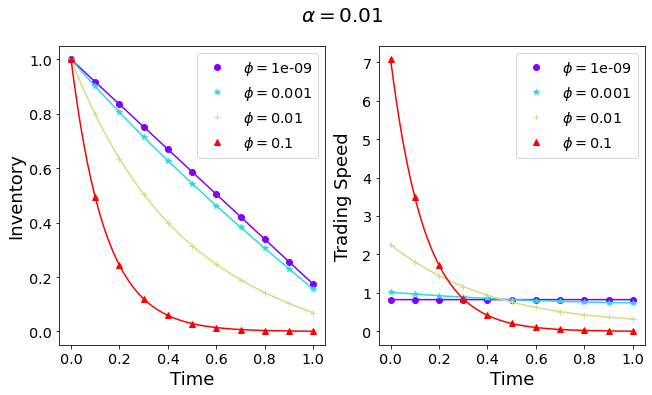

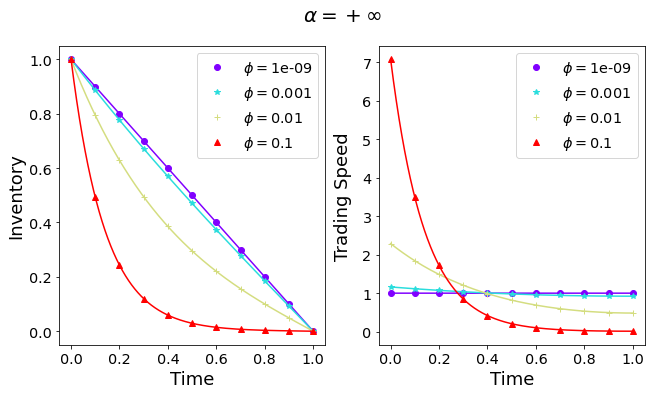

In [27]:
# Fig 6.2 of Page 148
lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
lppi_helpers.plot_inventory_trading_speed(100, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")